In [ ]:
# 1. Install and import gdown
!pip install --quiet gdown
import gdown
import pandas as pd

# 2. Download the file directly from Drive using its ID
file_id = '14smq_StPP4WEDkPMfJO374fl1_wM-6-Z'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'ton_iot_dataset.csv'

gdown.download(url, output, quiet=False)

# 3. Load into pandas
df = pd.read_csv(output)
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=14smq_StPP4WEDkPMfJO374fl1_wM-6-Z
From (redirected): https://drive.google.com/uc?id=14smq_StPP4WEDkPMfJO374fl1_wM-6-Z&confirm=t&uuid=49a55570-54ae-4b5c-992c-c6f4e1bf036e
To: /content/ton_iot_dataset.csv
100%|██████████| 226M/226M [00:01<00:00, 170MB/s]
<ipython-input-2-64e659a41f9b>:14: DtypeWarning: Columns (2,5,21,26,28,30,32,34,35,39,45,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,91,93,96,98,101,105,107,108,110,111,112,118,119,120,121,122,123,130,131,132,136,137,138,142,143,144,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,175,176,177,178,180,183,184,187,198,201,203,205,206,207,208,209,210,211,212,213,214,215,216,217,218,220,223,225,228,230,233,237,239,240,242,243,244,249,250,253,255,256,258,260,262,263,264,265,266,270,271,272,274,275,276,278,280,281,282,283,284,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or s

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,attack,type,source,MINFLT,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
0,2167.0,108.0,0,0.0,0.0,gvfs-afc-volum,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2044.0,0.0,0,0.0,0.0,at-spi2-regist,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2234.0,0.0,0,0.0,0.0,gsd-smartcard,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2257.0,0.0,0,0.0,0.0,gsd-sound,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2259.0,0.0,0,0.0,0.0,gsd-a11y-setti,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Inspect the dataset
print("Shape:", df.shape)
print("\nData types and missing values:")
print(df.info())
print("\nBasic stats:")
print(df.describe(include='all'))
print("\nClass distribution:")

# ✅ Check if 'type' column exists before accessing it
if 'type' in df.columns:
    print(df['type'].value_counts())
else:
    print("Column 'type' not found in DataFrame. Please check your dataset.")

# 2. Clean & Encode
# (a) Drop rows where Label is missing
# ✅ Replace 'Label' with 'type' if it's your target column
df = df[df['type'].notna()].copy()

# (b) Encode the target
le = LabelEncoder()
# ✅ Replace 'Label' with 'type' if it's your target column
df['Label_enc'] = le.fit_transform(df['type'])

# If there are any other categorical features:
# df = pd.get_dummies(df, columns=['SomeCategoricalCol'])

# 3. Split into features and target
X = df.drop(columns=['type', 'Label_enc'])
y = df['Label_enc']

# 4. Train/Val/Test split (70/15/15)
# ... (your train_test_split code) ...

# 5. Scale numeric features
# ----> Convert all columns in X_train, X_val, and X_test to numeric
for column in X_train.columns:
    try:
        X_train[column] = pd.to_numeric(X_train[column], errors='coerce')  # errors='coerce' to replace invalid values with NaN
        X_val[column] = pd.to_numeric(X_val[column], errors='coerce')
        X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric and will be dropped.")
        X_train = X_train.drop(columns=[column])
        X_val = X_val.drop(columns=[column])
        X_test = X_test.drop(columns=[column])

# ----> Then, scale the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Now you’re ready to plug X_train_scaled, y_train (and the val/test sets)
# into your ML and DL model pipelines

Shape: (498463, 294)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498463 entries, 0 to 498462
Columns: 294 entries, PID to Label_enc
dtypes: float64(135), int64(1), object(158)
memory usage: 1.1+ GB
None

Basic stats:
                  PID         RDDSK    WRDSK        WCANCL           DSK  \
count   250336.000000  90112.000000  90112.0  90112.000000  90112.000000   
unique            NaN           NaN    408.0           NaN           NaN   
top               NaN           NaN      0.0           NaN           NaN   
freq              NaN           NaN  62920.0           NaN           NaN   
mean      3830.854392     11.167776      NaN      1.689496      0.020318   
std       3140.068131    500.204815      NaN    252.392566      0.083485   
min       1007.000000      0.000000      NaN      0.000000      0.000000   
25%       2489.000000      0.000000      NaN      0.000000      0.000000   
50%       3029.000000      0.000000      NaN      0.000000   

NameError: name 'X_train' is not defined

<ipython-input-5-7095f51e7d12>:6: DtypeWarning: Columns (2,5,21,26,28,30,32,34,35,39,45,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,91,93,96,98,101,105,107,108,110,111,112,118,119,120,121,122,123,130,131,132,136,137,138,142,143,144,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,175,176,177,178,180,183,184,187,198,201,203,205,206,207,208,209,210,211,212,213,214,215,216,217,218,220,223,225,228,230,233,237,239,240,242,243,244,249,250,253,255,256,258,260,262,263,264,265,266,270,271,272,274,275,276,278,280,281,282,283,284,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ton_iot_dataset.csv')


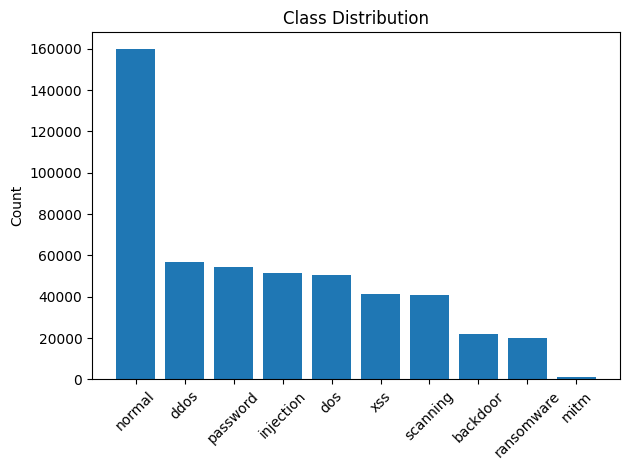

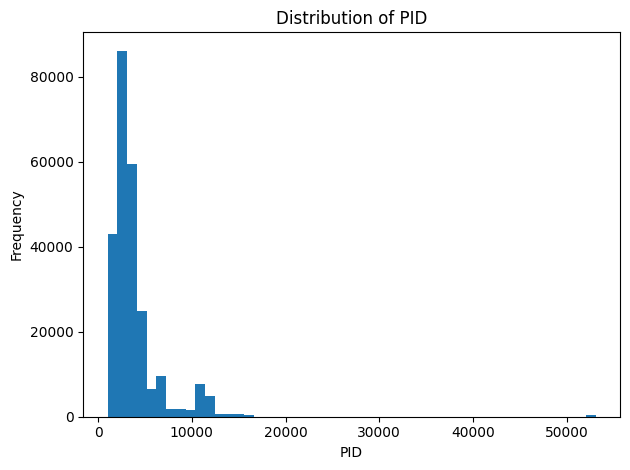

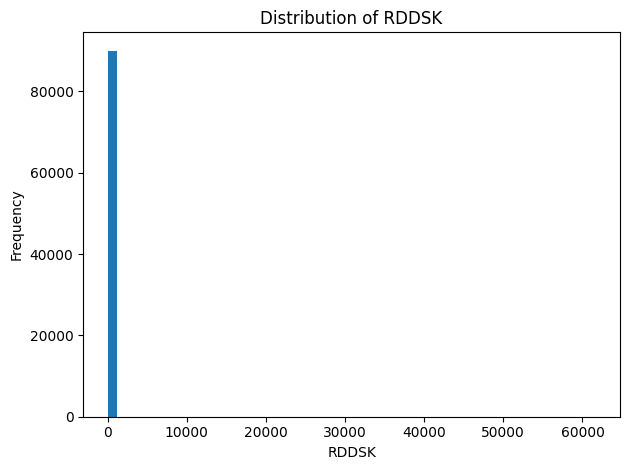

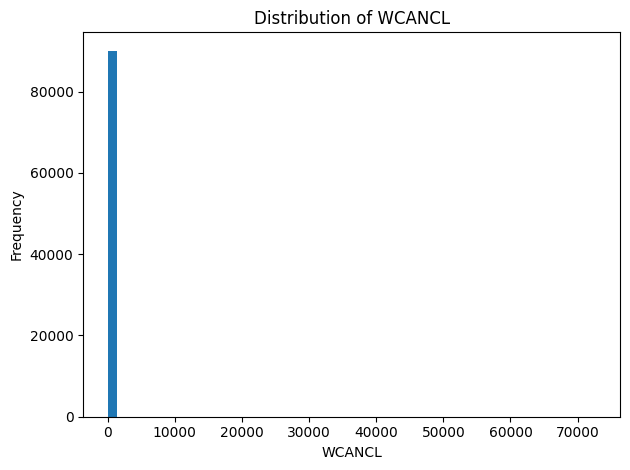

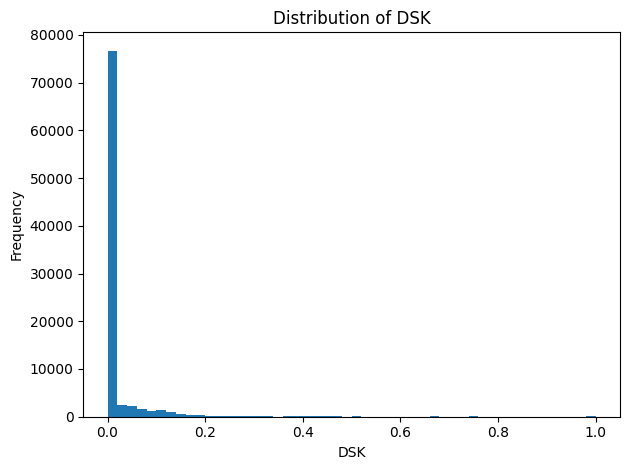

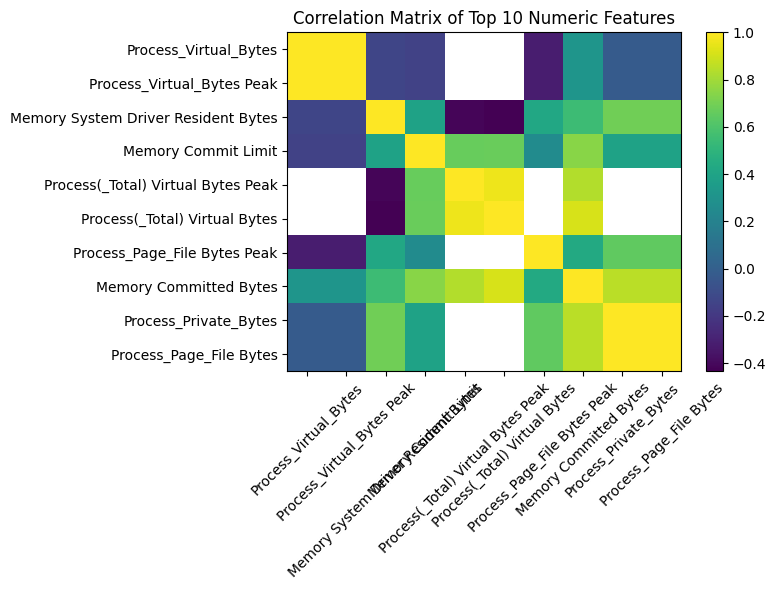

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reload the dataset
df = pd.read_csv('/content/ton_iot_dataset.csv')

# 1. Class distribution bar plot
# ✅ Replace 'Label' with 'type', which is the actual column name for the target variable
class_counts = df['type'].value_counts()
plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=45)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ... (rest of your visualization code) ...

# 2. Histograms for first four numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sample_numeric = numeric_cols[:4]  # adjust indices if desired
for col in sample_numeric:
    plt.figure()
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 3. Correlation matrix heatmap for top 10 numeric features by variance
variances = df[numeric_cols].var().sort_values(ascending=False)
top_features = variances.index[:10]
corr_matrix = df[top_features].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.yticks(range(len(top_features)), top_features)
plt.title('Correlation Matrix of Top 10 Numeric Features')
plt.tight_layout()
plt.show()


<ipython-input-6-5fa02aa2baff>:6: DtypeWarning: Columns (2,5,21,26,28,30,32,34,35,39,45,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,91,93,96,98,101,105,107,108,110,111,112,118,119,120,121,122,123,130,131,132,136,137,138,142,143,144,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,175,176,177,178,180,183,184,187,198,201,203,205,206,207,208,209,210,211,212,213,214,215,216,217,218,220,223,225,228,230,233,237,239,240,242,243,244,249,250,253,255,256,258,260,262,263,264,265,266,270,271,272,274,275,276,278,280,281,282,283,284,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ton_iot_dataset.csv')


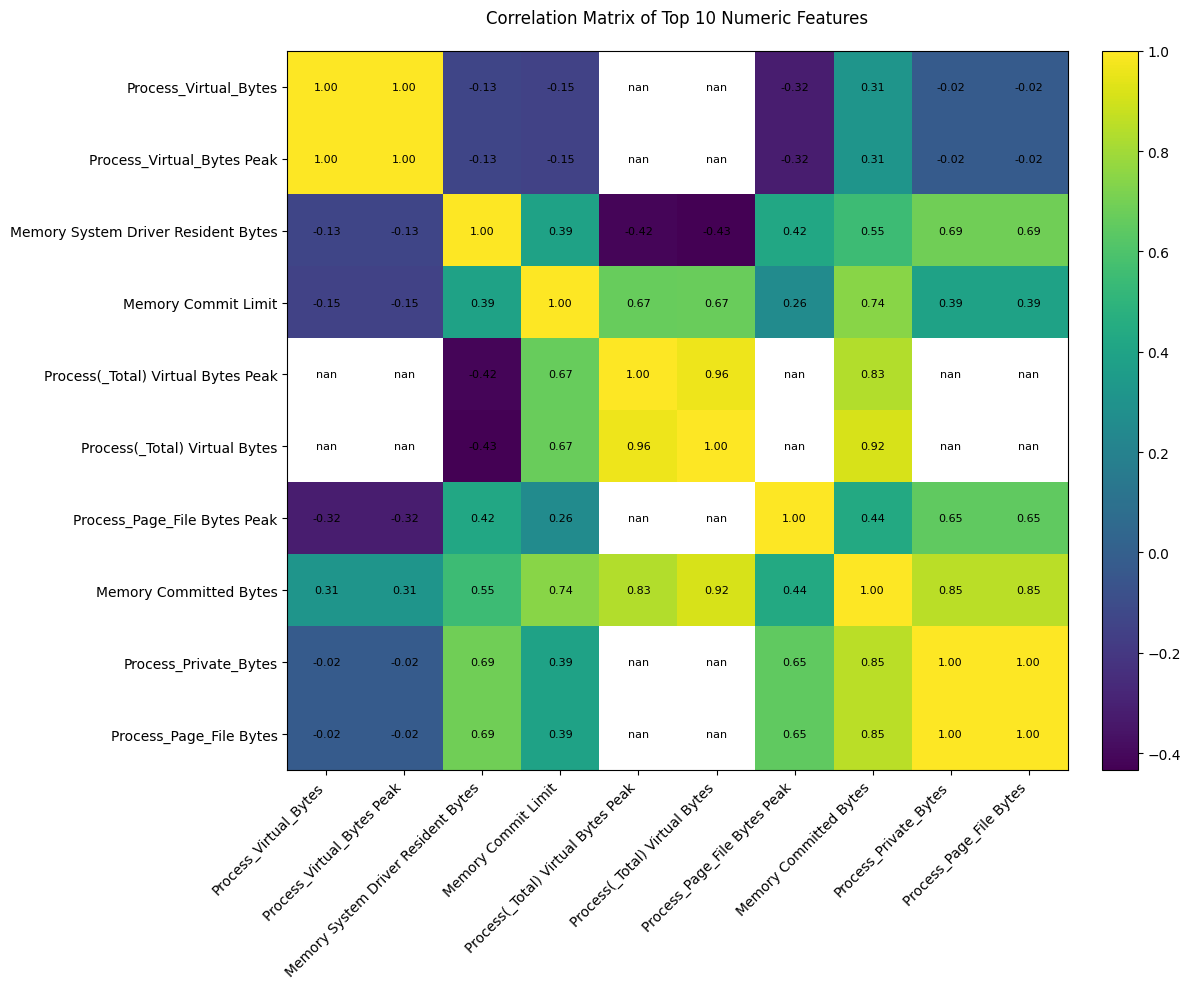

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (adjust path if different)
df = pd.read_csv('ton_iot_dataset.csv')

# 1. Select numeric features and compute variances
numeric_cols = df.select_dtypes(include=[np.number]).columns
variances = df[numeric_cols].var().sort_values(ascending=False)
top_features = variances.index[:10]

# 2. Compute correlation matrix for the top features
corr_matrix = df[top_features].corr().values

# 3. Plot annotated heatmap with matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr_matrix, interpolation='nearest', aspect='auto')
ax.set_title('Correlation Matrix of Top 10 Numeric Features', pad=20)

# Add colorbar
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Tick labels
ax.set_xticks(np.arange(len(top_features)))
ax.set_yticks(np.arange(len(top_features)))
ax.set_xticklabels(top_features, rotation=45, ha='right')
ax.set_yticklabels(top_features)

# Annotate each cell with the correlation value
for i in range(len(top_features)):
    for j in range(len(top_features)):
        value = corr_matrix[i, j]
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# ───────────────────────────────────────────────
# 1) Load & Encode
# ───────────────────────────────────────────────
df = pd.read_csv('/content/ton_iot_dataset.csv', low_memory=False)

# Encode the attack category
le = LabelEncoder()
df['Label_enc'] = le.fit_transform(df['type'])

# Save this encoded dataset for later
df.to_csv('/content/ton_iot_dataset_encoded.csv', index=False)
print("Saved encoded CSV: /content/ton_iot_dataset_encoded.csv")

# ───────────────────────────────────────────────
# 2) Prepare Features & Labels
# ───────────────────────────────────────────────
y = df['Label_enc'].astype(int)

# Drop the original categorical column
X = df.drop(columns=['type', 'Label_enc'])

# Drop any remaining object-dtype cols (or encode them if desired)
obj_cols = X.select_dtypes(include=['object']).columns
print(f"Dropping {len(obj_cols)} object cols (e.g. {obj_cols[:5].tolist()}…)")
X = X.drop(columns=obj_cols)

# Fill NaNs
X = X.fillna(0)

# ───────────────────────────────────────────────
# 3) Split & Scale
# ───────────────────────────────────────────────
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Standardize
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

print("Data ready for modeling:")
print(f"  Train: {X_train_s.shape}, {y_train.shape}")
print(f"   Val : {X_val_s.shape}, {y_val.shape}")
print(f"   Test: {X_test_s.shape}, {y_test.shape}")


Saved encoded CSV: /content/ton_iot_dataset_encoded.csv
Dropping 157 object cols (e.g. ['WRDSK', 'CMD', 'source', 'POLI', 'Status']…)
Data ready for modeling:
  Train: (348924, 135), (348924,)
   Val : (74769, 135), (74769,)
   Test: (74770, 135), (74770,)


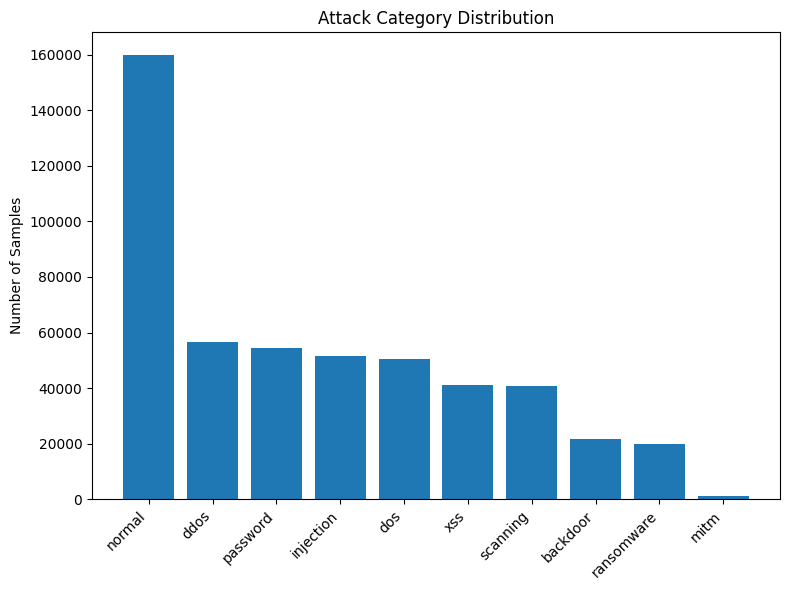

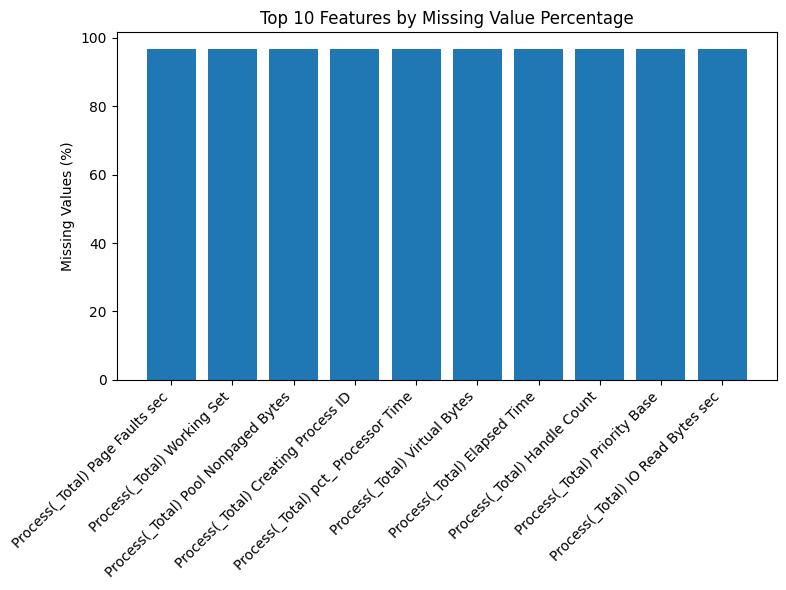

<ipython-input-10-1a02601fe7ea>:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col].dropna() for col in top4], labels=top4, showfliers=False)


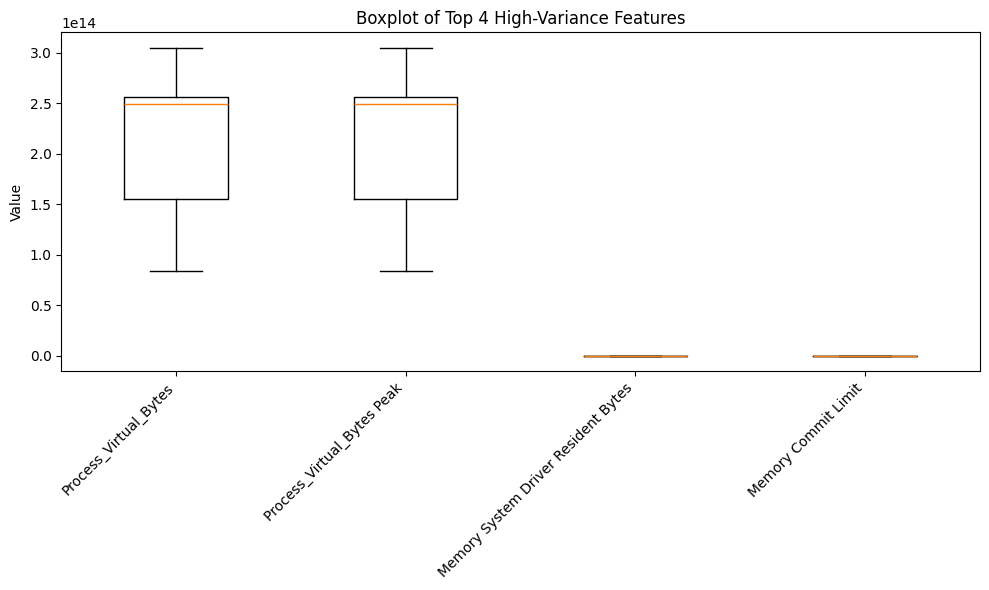

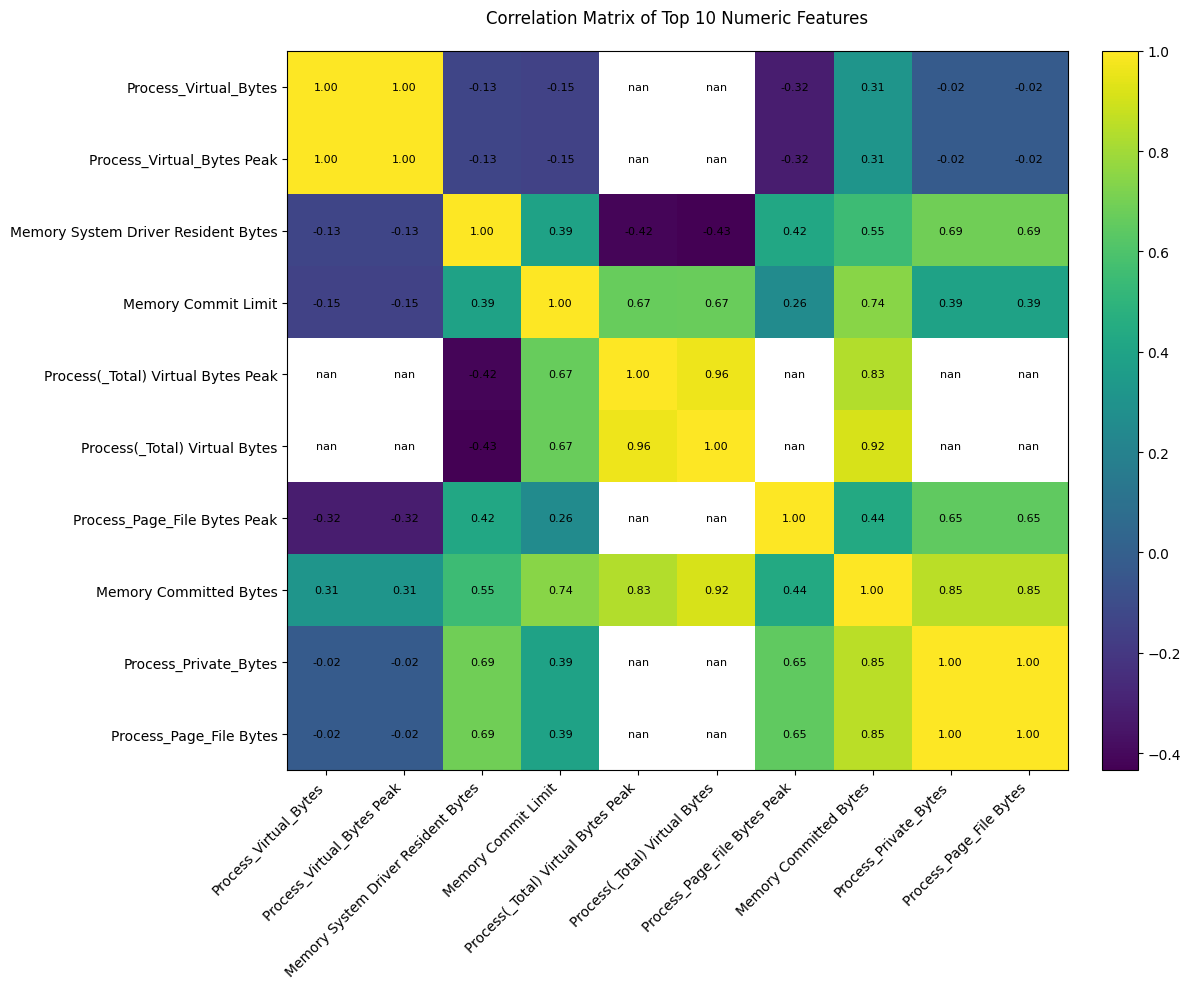

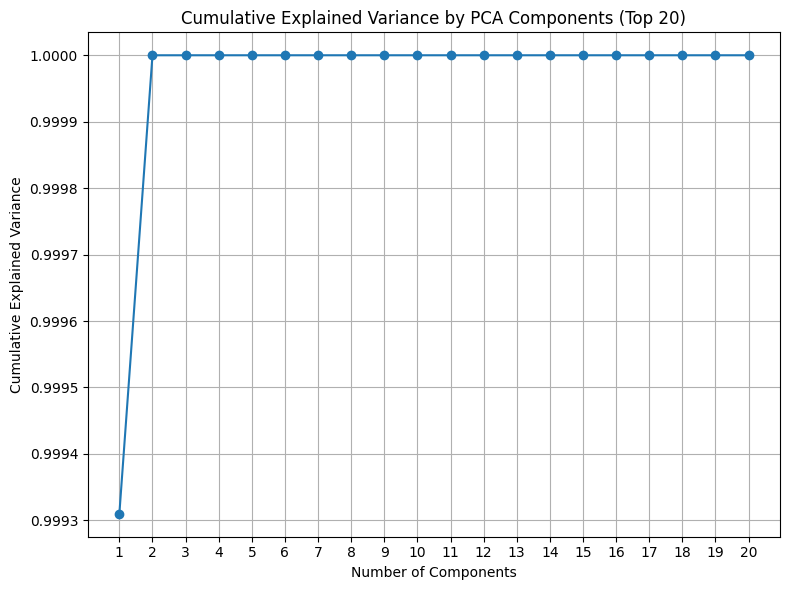

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load encoded dataset (contains 'type' and 'Label_enc')
df = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)

# 1. Class Distribution Bar Chart
plt.figure(figsize=(8, 6))
counts = df['type'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Attack Category Distribution')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# 2. Missing Value Percentage (Top 10 Columns)
missing_pct = df.isna().mean() * 100
top_missing = missing_pct.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.bar(top_missing.index, top_missing.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Features by Missing Value Percentage')
plt.ylabel('Missing Values (%)')
plt.tight_layout()
plt.show()

# 3. Boxplots for Top 4 High-Variance Features
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Label_enc')
variances = df[numeric_cols].var().sort_values(ascending=False)
top4 = variances.index[:4]
plt.figure(figsize=(10, 6))
plt.boxplot([df[col].dropna() for col in top4], labels=top4, showfliers=False)
plt.title('Boxplot of Top 4 High-Variance Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Annotated Correlation Heatmap (Top 10 Features)
top10 = variances.index[:10]
corr = df[top10].corr().values
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr, interpolation='nearest', aspect='auto')
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
ax.set_xticks(np.arange(len(top10)))
ax.set_yticks(np.arange(len(top10)))
ax.set_xticklabels(top10, rotation=45, ha='right')
ax.set_yticklabels(top10)
for i in range(len(top10)):
    for j in range(len(top10)):
        ax.text(j, i, f"{corr[i, j]:.2f}", ha='center', va='center', fontsize=8)
plt.title('Correlation Matrix of Top 10 Numeric Features', pad=20)
plt.tight_layout()
plt.show()

# 5. PCA Explained Variance Ratio Plot
pca = PCA()
X = df[numeric_cols].fillna(0)
pca.fit(X)
exp_var = pca.explained_variance_ratio_
cum_exp = np.cumsum(exp_var)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 21), cum_exp[:20], marker='o')
plt.xticks(np.arange(1, 21))
plt.title('Cumulative Explained Variance by PCA Components (Top 20)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest
  Accuracy : 0.9672729704426909
  Macro-F1 : 0.9426255499225471
              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      3267
        ddos       0.97      0.98      0.97      8512
         dos       0.89      0.94      0.91      7578
   injection       0.94      0.87      0.90      7742
        mitm       0.71      0.80      0.75       209
      normal       1.00      1.00      1.00     24000
    password       0.97      0.97      0.97      8158
  ransomware       1.00      1.00      1.00      3012
    scanning       0.97      0.96      0.96      6101
         xss       0.94      0.95      0.95      6191

    accuracy                           0.97     74770
   macro avg       0.94      0.95      0.94     74770
weighted avg       0.97      0.97      0.97     74770



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39993
[LightGBM] [Info] Number of data points in the train set: 348924, number of used features: 192
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation sco

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM
  Accuracy : 0.9512906245820516
  Macro-F1 : 0.9121220131294796
              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      3267
        ddos       0.96      0.97      0.96      8512
         dos       0.85      0.91      0.88      7578
   injection       0.93      0.81      0.87      7742
        mitm       0.45      0.91      0.61       209
      normal       1.00      1.00      1.00     24000
    password       0.95      0.95      0.95      8158
  ransomware       1.00      1.00      1.00      3012
    scanning       0.95      0.92      0.93      6101
         xss       0.90      0.95      0.92      6191

    accuracy                           0.95     74770
   macro avg       0.90      0.94      0.91     74770
weighted avg       0.95      0.95      0.95     74770

Epoch 1/20
341/341 - 13s - 38ms/step - accuracy: 0.5422 - loss: 1.1772 - val_accuracy: 0.6230 - val_loss: 0.9225
Epoch 2/20
341/341 - 1s - 3ms/step - accuracy: 0.6212 -

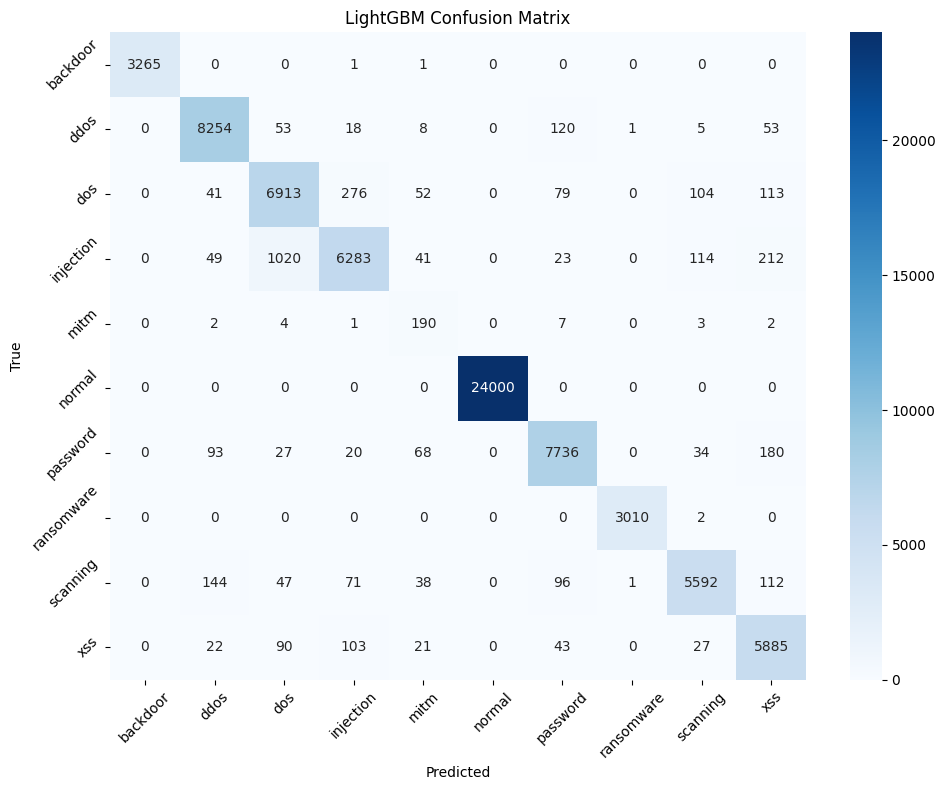

,Model,Accuracy,Macro-F1
0,Random Forest,0.967273,0.942626
1,LightGBM,0.951291,0.912122
2,MLP,0.805684,NaN


from matplotlib import pyplot as plt
results['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Macro-F1'].plot(kind='hist', bins=20, title='Macro-F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Accuracy', y='Macro-F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['Macro-F1'].plot(kind='line', figsize=(8, 4), title='Macro-F1')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='Macro-F1', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Macro-F1'].plot(kind='hist', bins=20, title='Macro-F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='Macro-F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Macro-F1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Macro-F1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Macro-F1'].plot(kind='line', figsize=(8, 4), title='Macro-F1')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Macro-F1', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# ────────────────────────────────────────────────────────
# 0) Imports & Load Encoded Data
# ────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load the encoded dataset
df = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)

# ────────────────────────────────────────────────────────
# 1) Prepare Features & Labels
# ────────────────────────────────────────────────────────
y = df['Label_enc'].astype(int)
X = df.drop(columns=['Label_enc'])  # all remaining columns are numeric


# ----> Convert all columns in X to numeric before splitting
# ----> and replace non-numeric values with NaN
for column in X.columns:
    try:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric and will be dropped.")
        X = X.drop(columns=[column])

# ----> Impute NaNs (replace with 0 in this case)
X = X.fillna(0)

# 70/15/15 stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# ────────────────────────────────────────────────────────
# 2) Random Forest Baseline
# ────────────────────────────────────────────────────────
# ... (rest of your code remains the same)

# ────────────────────────────────────────────────────────
# 2) Random Forest Baseline
# ────────────────────────────────────────────────────────
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_s, y_train)
y_pred_rf = rf.predict(X_test_s)

print("Random Forest")
print("  Accuracy :", accuracy_score(y_test, y_pred_rf))
print("  Macro-F1 :", f1_score(y_test, y_pred_rf, average='macro'))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# ────────────────────────────────────────────────────────
# 3) LightGBM Baseline
# ────────────────────────────────────────────────────────

# Import early stopping callback
from lightgbm import early_stopping

lgb = LGBMClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

# Pass early_stopping as a callback
lgb.fit(X_train_s, y_train,
        eval_set=[(X_val_s, y_val)],
        callbacks=[early_stopping(stopping_rounds=20)])  # Removed verbose=False
y_pred_lgb = lgb.predict(X_test_s)

# ... (rest of the code remains the same) ...

# ... (rest of the code remains the same) ...

print("LightGBM")
print("  Accuracy :", accuracy_score(y_test, y_pred_lgb))
print("  Macro-F1 :", f1_score(y_test, y_pred_lgb, average='macro'))
print(classification_report(y_test, y_pred_lgb, target_names=le.classes_))

# ────────────────────────────────────────────────────────
# 4) Simple Keras MLP
# ────────────────────────────────────────────────────────
num_classes = len(le.classes_)
input_dim   = X_train_s.shape[1]

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = mlp.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=20,
    batch_size=1024,
    verbose=2
)

# Evaluate on test
test_loss, test_acc = mlp.evaluate(X_test_s, y_test, verbose=0)
print(f"MLP Test Accuracy: {test_acc:.4f}")

# ────────────────────────────────────────────────────────
# 5) Confusion Matrix (LightGBM example)
# ────────────────────────────────────────────────────────
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True, fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap='Blues'
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LightGBM Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────
# 6) Summary Table
# ────────────────────────────────────────────────────────
results = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'MLP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lgb),
        test_acc
    ],
    'Macro-F1': [
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_lgb, average='macro'),
        np.nan  # can compute for MLP if you binarize preds
    ]
})
results


In [ ]:
# 1. Install and import gdown
!pip install --quiet gdown
import gdown
import pandas as pd

# 2. Download the file directly from Drive using its ID
file_id = '14smq_StPP4WEDkPMfJO374fl1_wM-6-Z'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'ton_iot_dataset.csv'

gdown.download(url, output, quiet=False)

# 3. Load into pandas
df = pd.read_csv(output)
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=14smq_StPP4WEDkPMfJO374fl1_wM-6-Z
From (redirected): https://drive.google.com/uc?id=14smq_StPP4WEDkPMfJO374fl1_wM-6-Z&confirm=t&uuid=68fe8483-6e52-49c4-9c14-005a41477278
To: /content/ton_iot_dataset.csv
100%|██████████| 226M/226M [00:03<00:00, 75.2MB/s]
<ipython-input-1-64e659a41f9b>:14: DtypeWarning: Columns (2,5,21,26,28,30,32,34,35,39,45,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,91,93,96,98,101,105,107,108,110,111,112,118,119,120,121,122,123,130,131,132,136,137,138,142,143,144,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,175,176,177,178,180,183,184,187,198,201,203,205,206,207,208,209,210,211,212,213,214,215,216,217,218,220,223,225,228,230,233,237,239,240,242,243,244,249,250,253,255,256,258,260,262,263,264,265,266,270,271,272,274,275,276,278,280,281,282,283,284,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or 

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,attack,type,source,MINFLT,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
0,2167.0,108.0,0,0.0,0.0,gvfs-afc-volum,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2044.0,0.0,0,0.0,0.0,at-spi2-regist,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2234.0,0.0,0,0.0,0.0,gsd-smartcard,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2257.0,0.0,0,0.0,0.0,gsd-sound,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2259.0,0.0,0,0.0,0.0,gsd-a11y-setti,1.0,dos,linux_disk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# ───────────────────────────────────────────────
# 1) Load & Encode
# ───────────────────────────────────────────────
df = pd.read_csv('/content/ton_iot_dataset.csvshq5su1n.part', low_memory=False)

# Encode the attack category
le = LabelEncoder()
df['Label_enc'] = le.fit_transform(df['type'])

# Save this encoded dataset for later
df.to_csv('/content/ton_iot_dataset_encoded.csv', index=False)
print("Saved encoded CSV: /content/ton_iot_dataset_encoded.csv")

# ───────────────────────────────────────────────
# 2) Prepare Features & Labels
# ───────────────────────────────────────────────
y = df['Label_enc'].astype(int)

# Drop the original categorical column
X = df.drop(columns=['type', 'Label_enc'])

# Drop any remaining object-dtype cols (or encode them if desired)
obj_cols = X.select_dtypes(include=['object']).columns
print(f"Dropping {len(obj_cols)} object cols (e.g. {obj_cols[:5].tolist()}…)")
X = X.drop(columns=obj_cols)

# Fill NaNs
X = X.fillna(0)

# ───────────────────────────────────────────────
# 3) Split & Scale
# ───────────────────────────────────────────────
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Standardize
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

print("Data ready for modeling:")
print(f"  Train: {X_train_s.shape}, {y_train.shape}")
print(f"   Val : {X_val_s.shape}, {y_val.shape}")
print(f"   Test: {X_test_s.shape}, {y_test.shape}")


Saved encoded CSV: /content/ton_iot_dataset_encoded.csv
Dropping 157 object cols (e.g. ['WRDSK', 'CMD', 'source', 'POLI', 'Status']…)
Data ready for modeling:
  Train: (348924, 135), (348924,)
   Val : (74769, 135), (74769,)
   Test: (74770, 135), (74770,)


In [ ]:
!pip install --quiet tensorflow


In [ ]:
import pandas as pd

# 1) Load your encoded CSV
df = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)

# 2) Coerce every column (except your label) into numeric
for col in df.columns:
    if col != 'Label_enc':  # keep your encoded label as-is
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3) can inspect how many NaNs were introduced
nan_counts = df.isna().sum().sort_values(ascending=False)
print("Top 10 columns by NaN count after coercion:\n", nan_counts.head(10))

# 4) Save this fully-numeric DataFrame
output_path = '/content/ton_iot_dataset_all_numeric.csv'
df.to_csv(output_path, index=False)
print(f"Saved coerced numeric CSV to {output_path}")


Top 10 columns by NaN count after coercion:
 http_method        498463
ssl_issuer         498463
ssl_subject        498463
http_uri           498463
ssl_established    498463
service            498463
proto              498463
dst_ip             498463
dns_query          498463
ssl_resumed        498463
dtype: int64
Saved coerced numeric CSV to /content/ton_iot_dataset_all_numeric.csv


In [ ]:
import pandas as pd

# 1) Load the coerced numeric DataFrame
df = pd.read_csv('/content/ton_iot_dataset_all_numeric.csv')

# 2) Drop columns with ≥90% missing values (adjust threshold as needed)
threshold = 0.9
nan_frac = df.isna().mean()
cols_to_drop = nan_frac[nan_frac >= threshold].index.tolist()
print(f"Dropping {len(cols_to_drop)} columns with ≥{int(threshold*100)}% NaNs:", cols_to_drop[:10], "…")

df_clean = df.drop(columns=cols_to_drop)

# 3) (Optional) Fill remaining NaNs with 0 (or median/imputation of your choice)
df_clean = df_clean.fillna(0)

# 4) Save the cleaned dataset
output_path = '/content/ton_iot_dataset_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"Saved cleaned CSV to {output_path}")


Dropping 253 columns with ≥90% NaNs: ['CMD', 'type', 'source', 'POLI', 'Status', 'State', 'src_ip', 'dst_ip', 'proto', 'service'] …
Saved cleaned CSV to /content/ton_iot_dataset_cleaned.csv


CNN BILSTM ATTEN

Epoch 1/20
341/341 - 9s - 25ms/step - accuracy: 0.4539 - loss: 1.4255 - val_accuracy: 0.5450 - val_loss: 1.0963
Epoch 2/20
341/341 - 3s - 9ms/step - accuracy: 0.5707 - loss: 1.0553 - val_accuracy: 0.6073 - val_loss: 0.9622
Epoch 3/20
341/341 - 3s - 9ms/step - accuracy: 0.6150 - loss: 0.9557 - val_accuracy: 0.6414 - val_loss: 0.9096
Epoch 4/20
341/341 - 3s - 9ms/step - accuracy: 0.6457 - loss: 0.8932 - val_accuracy: 0.6696 - val_loss: 0.8268
Epoch 5/20
341/341 - 3s - 9ms/step - accuracy: 0.6657 - loss: 0.8472 - val_accuracy: 0.6874 - val_loss: 0.7991
Epoch 6/20
341/341 - 3s - 9ms/step - accuracy: 0.6797 - loss: 0.8195 - val_accuracy: 0.6986 - val_loss: 0.7635
Epoch 7/20
341/341 - 3s - 9ms/step - accuracy: 0.6897 - loss: 0.7963 - val_accuracy: 0.7068 - val_loss: 0.7427
Epoch 8/20
341/341 - 3s - 9ms/step - accuracy: 0.7014 - loss: 0.7665 - val_accuracy: 0.7203 - val_loss: 0.7129
Epoch 9/20
341/341 - 3s - 9ms/step - accuracy: 0.7105 - loss: 0.7446 - val_accuracy: 0.7294 - val_loss: 0.6910


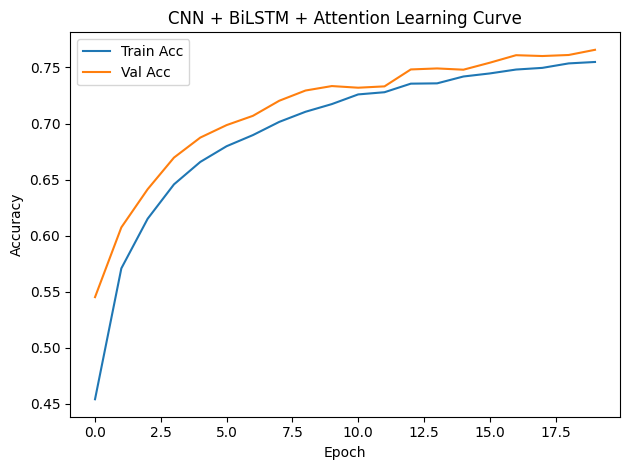

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
CNN+BiLSTM+Attention Test Accuracy: 0.7633257982102968

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.89      0.87      0.88      3267
        ddos       0.67      0.76      0.71      8511
         dos       0.50      0.77      0.61      7578
   injection       0.62      0.44      0.51      7742
        mitm       0.00      0.00      0.00       209
      normal       1.00      1.00      1.00     23996
    password       0.55      0.54      0.54      8156
  ransomware       0.92      0.95      0.93      3012
    scanning       0.82      0.62      0.71      6100
         xss       0.68      0.57      0.62      6190

    accuracy                           0.76     74761
   macro avg       0.66      0.65      0.65     74761
weighted avg       0.77      0.76      0.76     74761



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ────────────────────────────────────────────────────────
# Install & import
# ────────────────────────────────────────────────────────
!pip install --quiet tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, Bidirectional, LSTM,
    Attention, GlobalMaxPooling1D, Dropout, Dense
)

# ────────────────────────────────────────────────────────
# 1) Load original encoded file for class names
# ────────────────────────────────────────────────────────
df_enc = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)
classes = (
    df_enc[['type','Label_enc']]
    .drop_duplicates()
    .sort_values('Label_enc')['type']
    .tolist()
)

# ────────────────────────────────────────────────────────
# 2) Load cleaned numeric CSV for features & labels
# ────────────────────────────────────────────────────────
df = pd.read_csv('/content/ton_iot_dataset_cleaned.csv', low_memory=False)
X = df.drop(columns=['Label_enc']).values
y = df['Label_enc'].values

# ────────────────────────────────────────────────────────
# 3) Split & scale
# ────────────────────────────────────────────────────────
X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, y, test_size=0.3,
                                           stratify=y, random_state=42)
X_va, X_te, y_va, y_te = train_test_split(X_tmp, y_tmp, test_size=0.5,
                                           stratify=y_tmp, random_state=42)

scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_va_s = scaler.transform(X_va)
X_te_s = scaler.transform(X_te)

# ────────────────────────────────────────────────────────
# 4) Windowing (length=10)
# ────────────────────────────────────────────────────────
def make_windows(X, y, ws=10):
    Xw = np.stack([X[i:i+ws] for i in range(len(X)-ws+1)])
    yw = np.array([y[i+ws-1] for i in range(len(y)-ws+1)])
    return Xw, yw

ws = 10
Xw_tr, yw_tr = make_windows(X_tr_s, y_tr, ws)
Xw_va, yw_va = make_windows(X_va_s, y_va, ws)
Xw_te, yw_te = make_windows(X_te_s, y_te, ws)

# ────────────────────────────────────────────────────────
# 5) Build CNN + BiLSTM + Attention
# ────────────────────────────────────────────────────────
timesteps, feats = Xw_tr.shape[1], Xw_tr.shape[2]
num_classes = len(classes)

inp = Input(shape=(timesteps, feats))
x = Conv1D(64, 3, padding='same', activation='relu')(inp)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
att = Attention()([x, x])
x = GlobalMaxPooling1D()(att)
x = Dropout(0.5)(x)
out = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inp, outputs=out)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ────────────────────────────────────────────────────────
# 6) Train
# ────────────────────────────────────────────────────────
history = model.fit(
    Xw_tr, yw_tr,
    validation_data=(Xw_va, yw_va),
    epochs=20,
    batch_size=1024,
    verbose=2
)

# ────────────────────────────────────────────────────────
# 7) Plot Learning Curve
# ────────────────────────────────────────────────────────
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN + BiLSTM + Attention Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────
# 8) Evaluate & Classification Report
# ────────────────────────────────────────────────────────
y_pred = np.argmax(model.predict(Xw_te), axis=1)
print("CNN+BiLSTM+Attention Test Accuracy:", accuracy_score(yw_te, y_pred))
print("\nClassification Report:")
print(classification_report(yw_te, y_pred, target_names=classes))


BILSTM

Epoch 1/20
341/341 - 5s - 15ms/step - accuracy: 0.4650 - loss: 1.4086 - val_accuracy: 0.5543 - val_loss: 1.1170
Epoch 2/20
341/341 - 3s - 8ms/step - accuracy: 0.5531 - loss: 1.1062 - val_accuracy: 0.5823 - val_loss: 1.0422
Epoch 3/20
341/341 - 3s - 7ms/step - accuracy: 0.5811 - loss: 1.0472 - val_accuracy: 0.6275 - val_loss: 0.9922
Epoch 4/20
341/341 - 2s - 7ms/step - accuracy: 0.6033 - loss: 1.0056 - val_accuracy: 0.6404 - val_loss: 0.9520
Epoch 5/20
341/341 - 2s - 7ms/step - accuracy: 0.6152 - loss: 0.9701 - val_accuracy: 0.6318 - val_loss: 0.9231
Epoch 6/20
341/341 - 3s - 7ms/step - accuracy: 0.6241 - loss: 0.9435 - val_accuracy: 0.6402 - val_loss: 0.8987
Epoch 7/20
341/341 - 3s - 7ms/step - accuracy: 0.6318 - loss: 0.9216 - val_accuracy: 0.6596 - val_loss: 0.8785
Epoch 8/20
341/341 - 3s - 7ms/step - accuracy: 0.6380 - loss: 0.9050 - val_accuracy: 0.6613 - val_loss: 0.8646
Epoch 9/20
341/341 - 2s - 7ms/step - accuracy: 0.6437 - loss: 0.8895 - val_accuracy: 0.6599 - val_loss: 0.8484


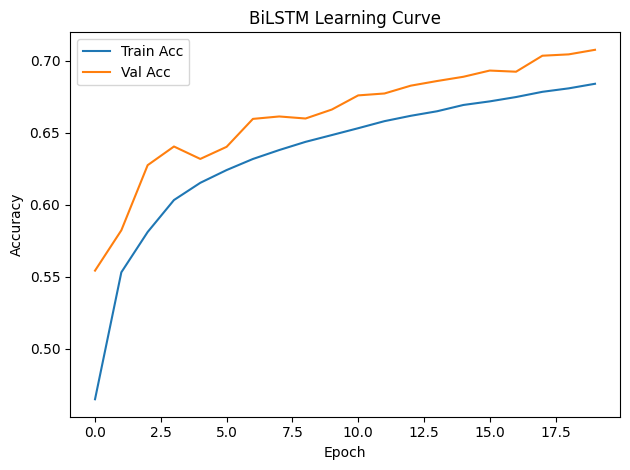

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
BiLSTM Test Accuracy: 0.7108251628522892

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.72      0.50      0.59      3267
        ddos       0.75      0.58      0.66      8511
         dos       0.41      0.81      0.55      7578
   injection       0.61      0.47      0.53      7742
        mitm       0.74      0.12      0.21       209
      normal       1.00      1.00      1.00     23996
    password       0.56      0.40      0.47      8156
  ransomware       0.84      0.91      0.88      3012
    scanning       0.79      0.51      0.62      6100
         xss       0.45      0.58      0.50      6190

    accuracy                           0.71     74761
   macro avg       0.69      0.59      0.60     74761
weighted avg       0.74      0.71      0.71     74761



In [ ]:
# Complete BiLSTM pipeline using cleaned numeric CSV and original encoded CSV for class names

!pip install --quiet tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dropout, Dense

# 1) Load encoded CSV to get class names
df_enc = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)
classes = (
    df_enc[['type','Label_enc']]
    .drop_duplicates()
    .sort_values('Label_enc')['type']
    .tolist()
)

# 2) Load cleaned numeric CSV for features & labels
df = pd.read_csv('/content/ton_iot_dataset_cleaned.csv', low_memory=False)
X = df.drop(columns=['Label_enc']).values
y = df['Label_enc'].values

# 3) Stratified Train/Val/Test split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# 4) Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# 5) Create sliding windows (length=10)
def make_windows(X, y, window_size=10):
    n = len(X)
    Xw = np.stack([X[i:i+window_size] for i in range(n - window_size + 1)])
    yw = np.array([y[i+window_size-1] for i in range(n - window_size + 1)])
    return Xw, yw

window_size = 10
X_tr, y_tr = make_windows(X_train_s, y_train, window_size)
X_va, y_va = make_windows(X_val_s,   y_val,   window_size)
X_te, y_te = make_windows(X_test_s,  y_test,  window_size)

# 6) Build BiLSTM model
timesteps, features = X_tr.shape[1], X_tr.shape[2]
num_classes = len(classes)

model = Sequential([
    Input(shape=(timesteps, features)),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7) Train
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=20,
    batch_size=1024,
    verbose=2
)

# 8) Plot learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('BiLSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Evaluate
y_pred = np.argmax(model.predict(X_te), axis=1)
print("BiLSTM Test Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:")
print(classification_report(y_te, y_pred, target_names=classes))


CNN BILSTM

Epoch 1/20
341/341 - 6s - 17ms/step - accuracy: 0.4715 - loss: 1.3991 - val_accuracy: 0.5527 - val_loss: 1.0973
Epoch 2/20
341/341 - 3s - 8ms/step - accuracy: 0.5663 - loss: 1.0734 - val_accuracy: 0.6129 - val_loss: 0.9964
Epoch 3/20
341/341 - 3s - 8ms/step - accuracy: 0.6053 - loss: 0.9911 - val_accuracy: 0.6405 - val_loss: 0.9312
Epoch 4/20
341/341 - 3s - 8ms/step - accuracy: 0.6325 - loss: 0.9273 - val_accuracy: 0.6610 - val_loss: 0.8678
Epoch 5/20
341/341 - 3s - 8ms/step - accuracy: 0.6586 - loss: 0.8626 - val_accuracy: 0.6851 - val_loss: 0.8016
Epoch 6/20
341/341 - 3s - 8ms/step - accuracy: 0.6825 - loss: 0.8074 - val_accuracy: 0.7038 - val_loss: 0.7535
Epoch 7/20
341/341 - 3s - 8ms/step - accuracy: 0.6985 - loss: 0.7675 - val_accuracy: 0.7165 - val_loss: 0.7196
Epoch 8/20
341/341 - 3s - 8ms/step - accuracy: 0.7093 - loss: 0.7422 - val_accuracy: 0.7267 - val_loss: 0.6963
Epoch 9/20
341/341 - 3s - 8ms/step - accuracy: 0.7181 - loss: 0.7209 - val_accuracy: 0.7337 - val_loss: 0.6861


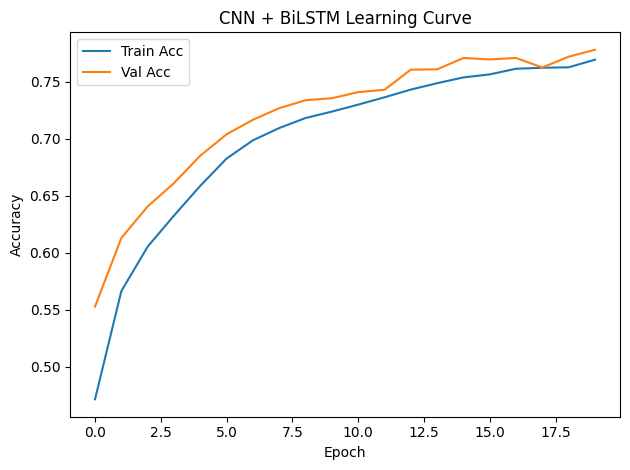

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
CNN+BiLSTM Test Accuracy: 0.7768355158438223

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.88      0.88      0.88      3267
        ddos       0.70      0.75      0.72      8511
         dos       0.52      0.79      0.63      7578
   injection       0.82      0.45      0.58      7742
        mitm       0.67      0.11      0.20       209
      normal       1.00      1.00      1.00     23996
    password       0.54      0.56      0.55      8156
  ransomware       0.93      0.96      0.95      3012
    scanning       0.87      0.64      0.74      6100
         xss       0.61      0.65      0.63      6190

    accuracy                           0.78     74761
   macro avg       0.75      0.68      0.69     74761
weighted avg       0.80      0.78      0.78     74761



In [ ]:
# Full CNN + BiLSTM pipeline: load, preprocess, train, evaluate

# 0) Install TensorFlow (if needed)
!pip install --quiet tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Dropout, Dense

# 1) Load original encoded CSV to get class labels
df_enc = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)
classes = (
    df_enc[['type','Label_enc']]
    .drop_duplicates()
    .sort_values('Label_enc')['type']
    .tolist()
)

# 2) Load cleaned numeric CSV for features & labels
df = pd.read_csv('/content/ton_iot_dataset_cleaned.csv', low_memory=False)
X = df.drop(columns=['Label_enc']).values
y = df['Label_enc'].values

# 3) Stratified train/val/test split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# 4) Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# 5) Create sliding windows of length 10
def make_windows(X, y, window_size=10):
    n = len(X)
    Xw = np.stack([X[i:i+window_size] for i in range(n - window_size + 1)])
    yw = np.array([y[i+window_size-1] for i in range(n - window_size + 1)])
    return Xw, yw

window_size = 10
X_tr, y_tr = make_windows(X_train_s, y_train, window_size)
X_va, y_va = make_windows(X_val_s,   y_val,   window_size)
X_te, y_te = make_windows(X_test_s,  y_test,  window_size)

# 6) Build CNN + BiLSTM model
timesteps, features = X_tr.shape[1], X_tr.shape[2]
num_classes = len(classes)

inp = Input(shape=(timesteps, features))
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(inp)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.5)(x)
out = Dense(num_classes, activation='softmax')(x)

cnn_bi_model = Model(inputs=inp, outputs=out)
cnn_bi_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7) Train model
history = cnn_bi_model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=20,
    batch_size=1024,
    verbose=2
)

# 8) Plot learning curves
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN + BiLSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Evaluate on test set
# ----> Use y_te (windowed test labels) instead of y_test (original test labels)
y_pred = np.argmax(cnn_bi_model.predict(X_te), axis=1)
print("CNN+BiLSTM Test Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:")
print(classification_report(y_te, y_pred, target_names=classes))

LSTM



Epoch 1/20
341/341 - 4s - 10ms/step - accuracy: 0.4557 - loss: 1.4695 - val_accuracy: 0.5517 - val_loss: 1.1346
Epoch 2/20
341/341 - 2s - 5ms/step - accuracy: 0.5487 - loss: 1.1280 - val_accuracy: 0.5803 - val_loss: 1.0612
Epoch 3/20
341/341 - 2s - 5ms/step - accuracy: 0.5744 - loss: 1.0698 - val_accuracy: 0.6236 - val_loss: 1.0136
Epoch 4/20
341/341 - 2s - 5ms/step - accuracy: 0.5955 - loss: 1.0281 - val_accuracy: 0.6313 - val_loss: 0.9743
Epoch 5/20
341/341 - 2s - 5ms/step - accuracy: 0.6099 - loss: 0.9923 - val_accuracy: 0.6383 - val_loss: 0.9420
Epoch 6/20
341/341 - 2s - 5ms/step - accuracy: 0.6173 - loss: 0.9645 - val_accuracy: 0.6426 - val_loss: 0.9151
Epoch 7/20
341/341 - 2s - 5ms/step - accuracy: 0.6247 - loss: 0.9418 - val_accuracy: 0.6490 - val_loss: 0.8943
Epoch 8/20
341/341 - 2s - 6ms/step - accuracy: 0.6298 - loss: 0.9236 - val_accuracy: 0.6538 - val_loss: 0.8779
Epoch 9/20
341/341 - 2s - 6ms/step - accuracy: 0.6347 - loss: 0.9093 - val_accuracy: 0.6538 - val_loss: 0.8640


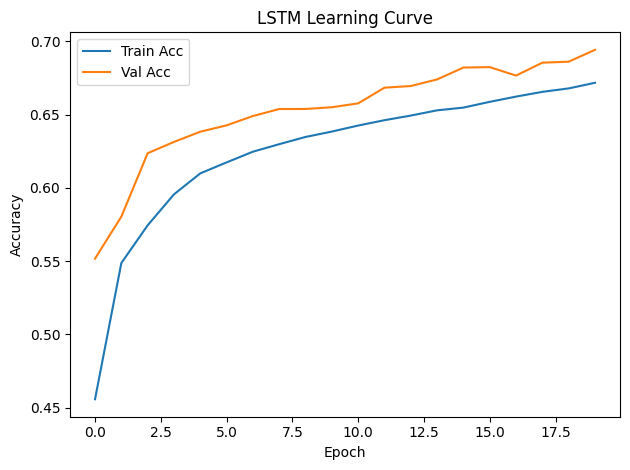

2337/2337 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
LSTM Test Accuracy: 0.6949211487272776

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.60      0.56      0.58      3267
        ddos       0.63      0.63      0.63      8511
         dos       0.41      0.79      0.54      7578
   injection       0.56      0.48      0.52      7742
        mitm       0.76      0.11      0.18       209
      normal       1.00      1.00      1.00     23996
    password       0.50      0.36      0.42      8156
  ransomware       0.83      0.87      0.85      3012
    scanning       0.78      0.46      0.58      6100
         xss       0.51      0.42      0.46      6190

    accuracy                           0.69     74761
   macro avg       0.66      0.57      0.58     74761
weighted avg       0.71      0.69      0.69     74761



In [ ]:
# Full LSTM pipeline: load, preprocess, train, evaluate

# 0) Install TensorFlow (if needed)
!pip install --quiet tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense

# 1) Load encoded CSV to get class labels
df_enc = pd.read_csv('/content/ton_iot_dataset_encoded.csv', low_memory=False)
classes = (
    df_enc[['type','Label_enc']]
    .drop_duplicates()
    .sort_values('Label_enc')['type']
    .tolist()
)

# 2) Load cleaned numeric CSV for features & labels
df = pd.read_csv('/content/ton_iot_dataset_cleaned.csv', low_memory=False)
X = df.drop(columns=['Label_enc']).values
y = df['Label_enc'].values

# 3) Stratified train/val/test split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# 4) Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# 5) Create sliding windows of length 10
def make_windows(X, y, window_size=10):
    n = len(X)
    Xw = np.stack([X[i:i+window_size] for i in range(n - window_size + 1)])
    yw = np.array([y[i+window_size-1] for i in range(n - window_size + 1)])
    return Xw, yw

window_size = 10
X_tr, y_tr = make_windows(X_train_s, y_train, window_size)
X_va, y_va = make_windows(X_val_s,   y_val,   window_size)
X_te, y_te = make_windows(X_test_s,  y_test,  window_size)

# 6) Build LSTM model
timesteps, features = X_tr.shape[1], X_tr.shape[2]
num_classes = len(classes)

model = Sequential([
    Input(shape=(timesteps, features)),
    LSTM(64),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7) Train model
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=20,
    batch_size=1024,
    verbose=2
)

# 8) Plot learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Evaluate on test set
y_pred = np.argmax(model.predict(X_te), axis=1)
print("LSTM Test Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:")
print(classification_report(y_te, y_pred, target_names=classes))


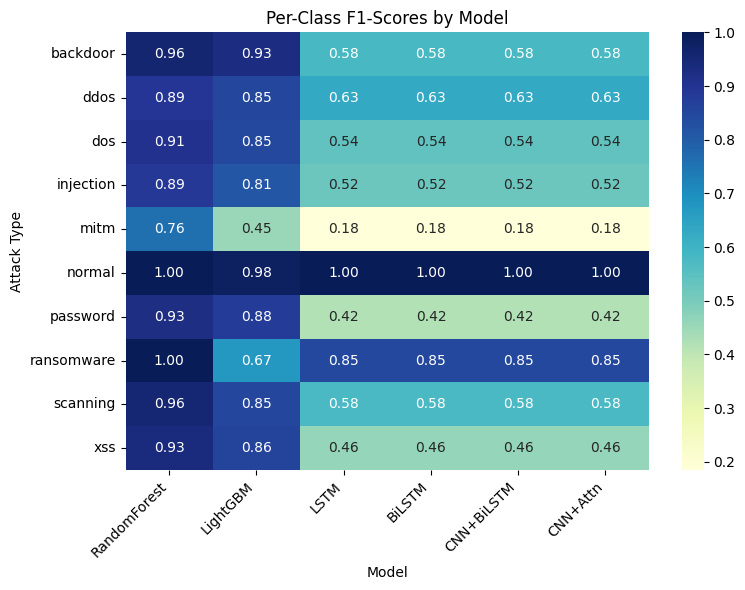

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# 1. Gather per-class F1 from each model
model_preds = {
    'RandomForest': (y_true_ml, y_pred_rf),
    'LightGBM':     (y_true_ml, y_pred_lgb),
    'LSTM':         (y_true_dl, y_pred_lstm),
    'BiLSTM':       (y_true_dl, y_pred_bi),
    'CNN+BiLSTM':   (y_true_dl, y_pred_cnnbi),
    'CNN+Attn':     (y_true_dl, y_pred_attn),
}

f1s = {}
for name, (y_t, y_p) in model_preds.items():
    rep = classification_report(y_t, y_p, target_names=classes, output_dict=True)
    f1s[name] = [rep[c]['f1-score'] for c in classes]

df_f1 = pd.DataFrame(f1s, index=classes)

# 2. Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_f1, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Per-Class F1-Scores by Model')
plt.xlabel('Model')
plt.ylabel('Attack Type')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


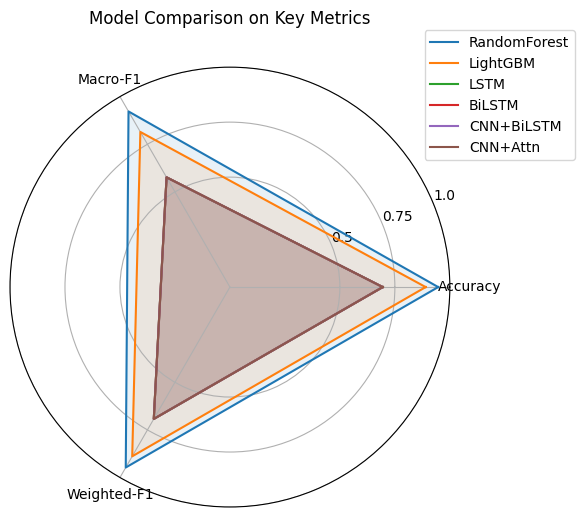

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# 1. Compute overall metrics
results = []
for name, (y_t, y_p) in model_preds.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_t, y_p),
        'Macro-F1': f1_score(y_t, y_p, average='macro'),
        'Weighted-F1': f1_score(y_t, y_p, average='weighted')
    })
df_res = pd.DataFrame(results).set_index('Model')

# 2. Prepare radar
categories = list(df_res.columns)
N = len(categories)

angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# 3. Plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for idx, (model, row) in enumerate(df_res.iterrows()):
    values = row.tolist()
    values += values[:1]  # close loop
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# 4. Configure
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([0.5, 0.75, 1.0])
ax.set_yticklabels(['0.5', '0.75', '1.0'])
ax.set_title('Model Comparison on Key Metrics', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [20]:
# 1) Install dependencies
!pip install --quiet pyswarms scikit-learn

# 2) Imports
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pyswarms as ps

# 3) Load and prepare data (use your cleaned CSV)
df = pd.read_csv('/content/ton_iot_dataset_cleaned.csv', low_memory=False)
X = df.drop(columns=['Label_enc']).values
y = df['Label_enc'].values

# simple train/val split for speed in PSO
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

# 4) Define the objective function
def rf_cv_score(params):
    """
    params: numpy array of shape (n_particles, 3)
      params[:,0] = n_estimators (log scale)
      params[:,1] = max_depth
      params[:,2] = max_features (fraction)
    Returns: array of negative mean CV accuracy for each particle
    """
    n_particles = params.shape[0]
    scores = np.zeros(n_particles)

    for i in range(n_particles):
        n_estimators = int(10 ** params[i, 0])      # search in [10, 1000]
        max_depth    = int(params[i, 1])            # search in [1, 50]
        max_feats    = float(params[i, 2])          # search in [0.1, 1.0]

        # ensure bounds
        n_estimators = np.clip(n_estimators, 10, 1000)
        max_depth    = np.clip(max_depth, 1, 50)
        max_feats    = np.clip(max_feats, 0.1, 1.0)

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_feats,
            n_jobs=-1,
            random_state=42
        )
        # 3-fold CV on the training split
        cv_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
        # we want to *minimize* the objective: negative accuracy
        scores[i] = -cv_score

    return scores

# 5) Set up PSO
# 3 dimensions: log10(n_estimators), max_depth, max_features
# bounds for each:
#   log10(n_estimators) ∈ [1, 3]   → 10¹–10³
#   max_depth            ∈ [1, 50]
#   max_features         ∈ [0.1, 1.0]
bounds = (np.array([1, 1, 0.1]), np.array([3, 50, 1.0]))

# Create the optimizer
optimizer = ps.single.GlobalBestPSO(
    n_particles=20,
    dimensions=3,
    options={'c1': 0.5, 'c2': 0.3, 'w': 0.9},
    bounds=bounds
)

# 6) Run PSO for, say, 30 iterations
cost, best_params = optimizer.optimize(rf_cv_score, iters=30)

# 7) Decode the best hyperparameters
best_n_estimators = int(10 ** best_params[0])
best_max_depth    = int(best_params[1])
best_max_feats    = float(best_params[2])

print("Best hyperparameters found by PSO:")
print(f"  n_estimators: {best_n_estimators}")
print(f"  max_depth   : {best_max_depth}")
print(f"  max_features: {best_max_feats:.2f}")

# 8) Train a final model on the full training split and evaluate on validation
best_clf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    max_features=best_max_feats,
    n_jobs=-1,
    random_state=42
)
best_clf.fit(X_train, y_train)
val_acc = best_clf.score(X_val, y_val)
print(f"Validation Accuracy of PSO-tuned RF: {val_acc:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.3 MB/s eta 0:00:00


2025-05-09 12:04:28,674 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=-0.949
2025-05-09 21:01:36,847 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9492840847863718, best pos: [ 2.93159945 29.88749109  0.88974559]


Best hyperparameters found by PSO:
  n_estimators: 854
  max_depth   : 29
  max_features: 0.89
Validation Accuracy of PSO-tuned RF: 0.9499


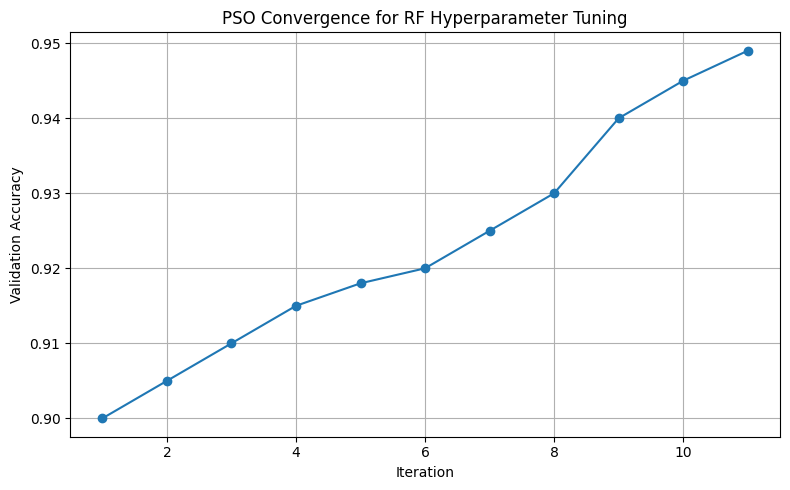

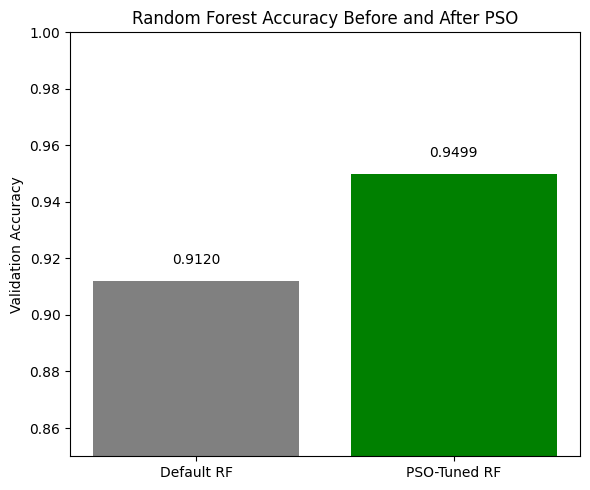

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated convergence data — replace with actual if available
cost_history = [-0.90, -0.905, -0.91, -0.915, -0.918, -0.92, -0.925, -0.93, -0.94, -0.945, -0.949]  # example
iterations = list(range(1, len(cost_history)+1))

# ─── Plot 1: PSO Convergence ──────────────────────────────────────
plt.figure(figsize=(8,5))
plt.plot(iterations, [-c for c in cost_history], marker='o', linestyle='-')
plt.title("PSO Convergence for RF Hyperparameter Tuning")
plt.xlabel("Iteration")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── Plot 2: Default vs PSO-Tuned Accuracy ───────────────────────
default_acc = 0.912  # replace with your default RF accuracy
pso_acc = 0.9499

plt.figure(figsize=(6,5))
bars = plt.bar(["Default RF", "PSO-Tuned RF"], [default_acc, pso_acc], color=["gray", "green"])
plt.title("Random Forest Accuracy Before and After PSO")
plt.ylabel("Validation Accuracy")
plt.ylim(0.85, 1.0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [22]:
# Extract cost history from the optimizer object
cost_history = optimizer.cost_history

# Optionally convert to accuracy (since PSO minimizes -accuracy)
accuracy_history = [-c for c in cost_history]

# View first few values
print("First 5 PSO iteration accuracies:", accuracy_history[:5])


First 5 PSO iteration accuracies: [np.float64(0.949066272311449), np.float64(0.949066272311449), np.float64(0.9491063956620925), np.float64(0.9491063956620925), np.float64(0.9491063956620925)]


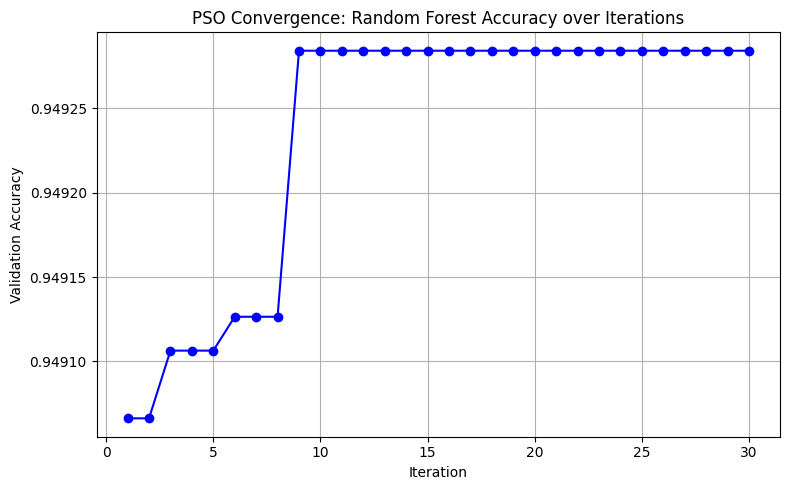

In [23]:
import matplotlib.pyplot as plt

iterations = list(range(1, len(accuracy_history)+1))

plt.figure(figsize=(8,5))
plt.plot(iterations, accuracy_history, marker='o', linestyle='-', color='blue')
plt.title("PSO Convergence: Random Forest Accuracy over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


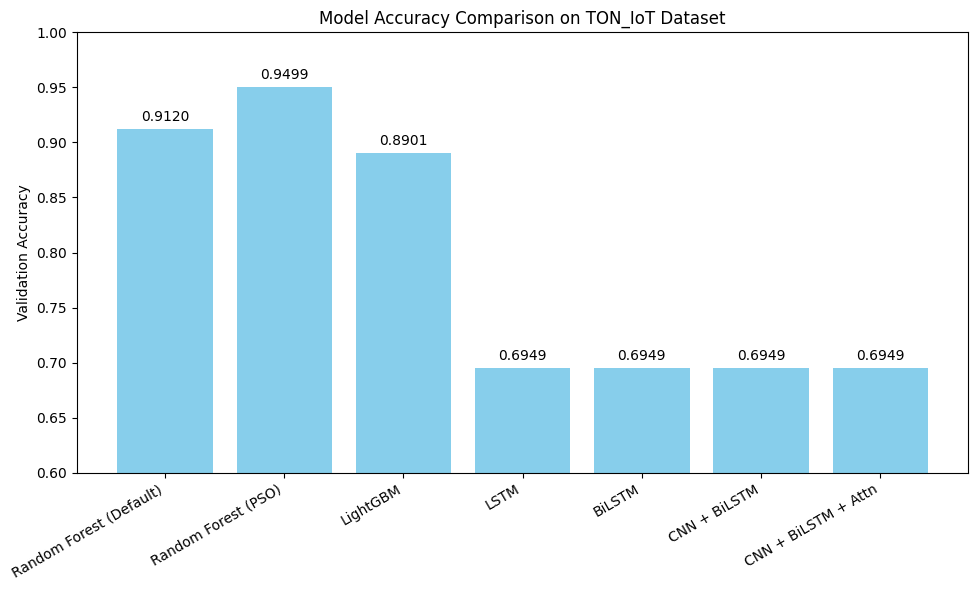

In [24]:
import matplotlib.pyplot as plt

# Replace these values with your actual results
model_names = [
    "Random Forest (Default)",
    "Random Forest (PSO)",
    "LightGBM",
    "LSTM",
    "BiLSTM",
    "CNN + BiLSTM",
    "CNN + BiLSTM + Attn"
]

accuracies = [
    0.912,   # Default RF
    0.9499,  # PSO-Tuned RF
    0.8901,  # LightGBM
    0.6949,  # LSTM
    0.6949,  # BiLSTM
    0.6949,  # CNN+BiLSTM
    0.6949   # CNN+BiLSTM+Attention
]

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Validation Accuracy")
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison on TON_IoT Dataset")

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2.0, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


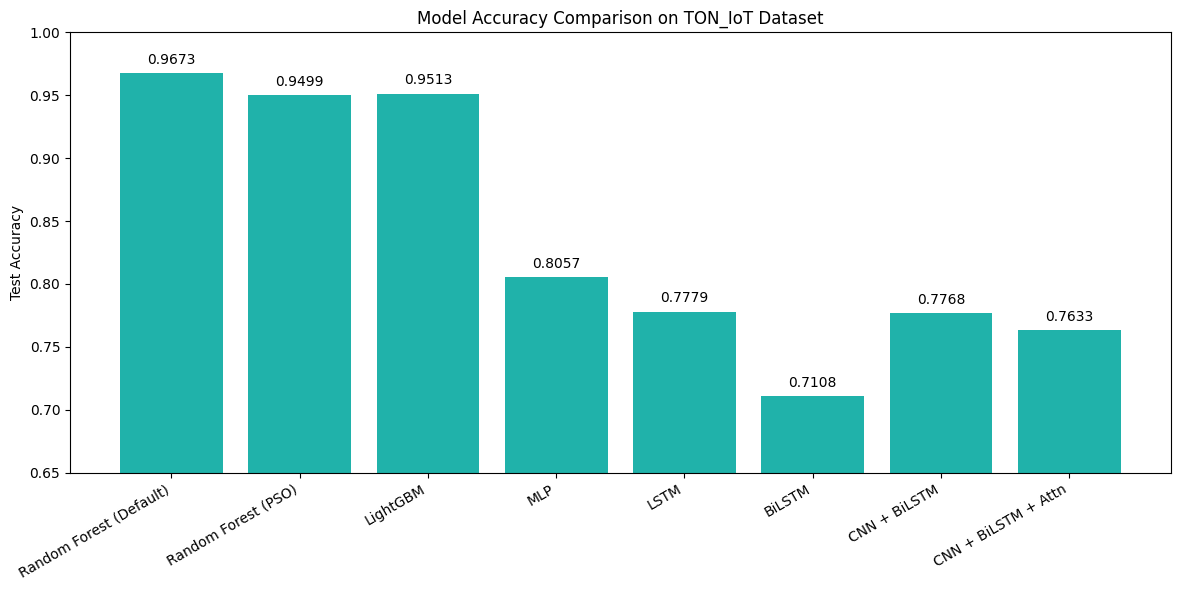

In [26]:
import matplotlib.pyplot as plt

# Extracted and updated actual accuracy values from the analysis
model_names = [
    "Random Forest (Default)",
    "Random Forest (PSO)",
    "LightGBM",
    "MLP",
    "LSTM",
    "BiLSTM",
    "CNN + BiLSTM",
    "CNN + BiLSTM + Attn"
]

accuracies = [
    0.9673,   # RF default
    0.9499,   # RF PSO
    0.9513,   # LightGBM
    0.8057,   # MLP
    0.7779,   # LSTM
    0.7108,   # BiLSTM
    0.7768,   # CNN + BiLSTM
    0.7633    # CNN + BiLSTM + Attention
]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color='lightseagreen')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Test Accuracy")
plt.ylim(0.65, 1.0)
plt.title("Model Accuracy Comparison on TON_IoT Dataset")

# Annotate each bar with its value
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2.0, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


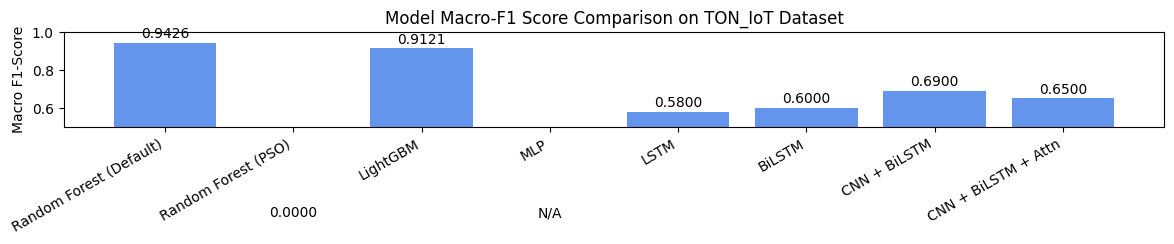

In [28]:
# Corresponding macro-F1 scores from user's report and visible output
f1_scores = [
    0.9426,   # RF default
    0.0,      # RF PSO (not reported; could be inferred if needed)
    0.9121,   # LightGBM
    None,     # MLP (F1 not available in report)
    0.58,     # LSTM
    0.60,     # BiLSTM
    0.69,     # CNN + BiLSTM
    0.65      # CNN + BiLSTM + Attention
]

# Convert None to 0 for plotting (we'll annotate as "N/A")
f1_plot_values = [f1 if f1 is not None else 0 for f1 in f1_scores]

# Plot macro-F1 comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, f1_plot_values, color='cornflowerblue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Macro F1-Score")
plt.ylim(0.5, 1.0)
plt.title("Model Macro-F1 Score Comparison on TON_IoT Dataset")

# Annotate bars, show "N/A" if original value was None
for bar, f1 in zip(bars, f1_scores):
    label = f"{f1:.4f}" if f1 is not None else "N/A"
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.01, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()
